In [1]:
pip install lightgbm matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import lightgbm as lgb
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
house_prices = fetch_openml(data_id=42165, as_frame=True, parser='auto')
data = house_prices.frame

In [5]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

In [6]:
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_cols) > 0:
    print(f"Non-numeric columns found: {non_numeric_cols}")

Non-numeric columns found: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [7]:
numeric_cols = X.select_dtypes(include=[np.number]).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

In [8]:
X = pd.get_dummies(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [11]:
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',      # Gradient Boosting Decision Tree
    'num_leaves': 31,             # Maximum number of leaves in one tree
    'learning_rate': 0.05,        # Learning rate
    'feature_fraction': 0.9,      # Feature fraction
    'early_stopping_round': 10,   # Number of rounds for early stopping
    'verbose': 10                 # Print evaluation results every 10 rounds
}

In [12]:
gbm = lgb.train(params,
                train_data,
                num_boost_round=100,    # Number of boosting iterations
                valid_sets=[train_data, test_data])  # Validation sets

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.920284
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.629471
[LightGBM] [Debug] init for col-wise cost 0.001174 seconds, init for row-wise cost 0.001490 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3449
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 180
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 181441.541952
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
Training until validation scores don't improve for 10 rounds
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves

In [13]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [14]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 888138790.2118032


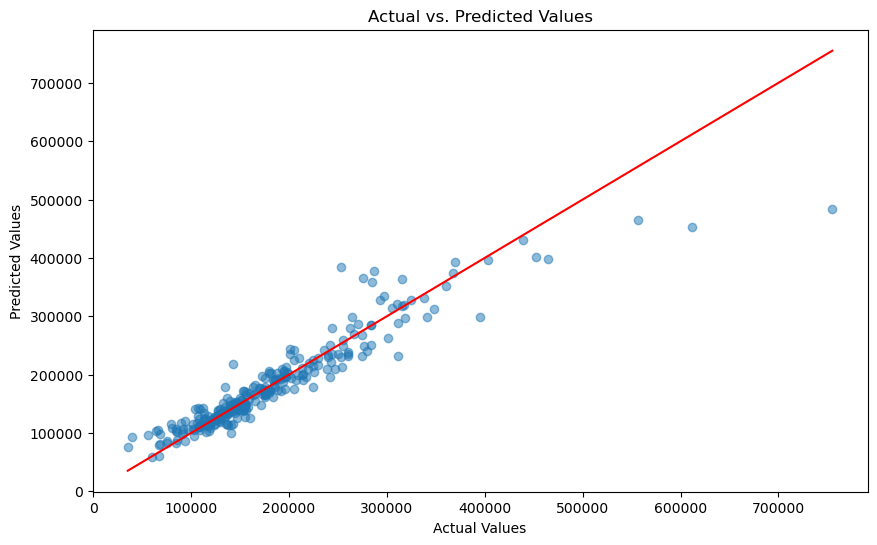

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

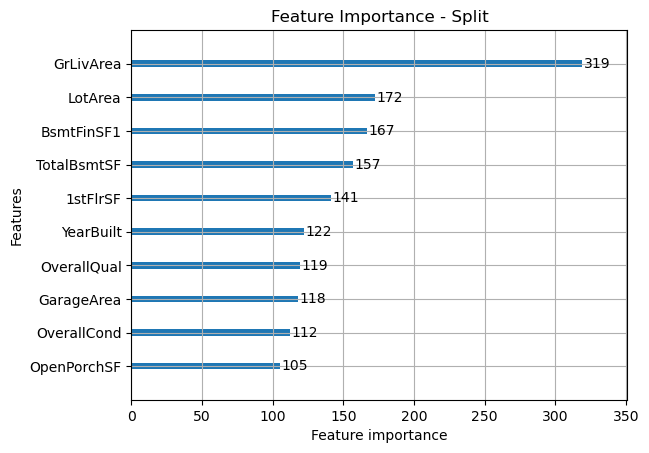

In [16]:
lgb.plot_importance(gbm, max_num_features=10, importance_type='split')
plt.title("Feature Importance - Split")
plt.show()

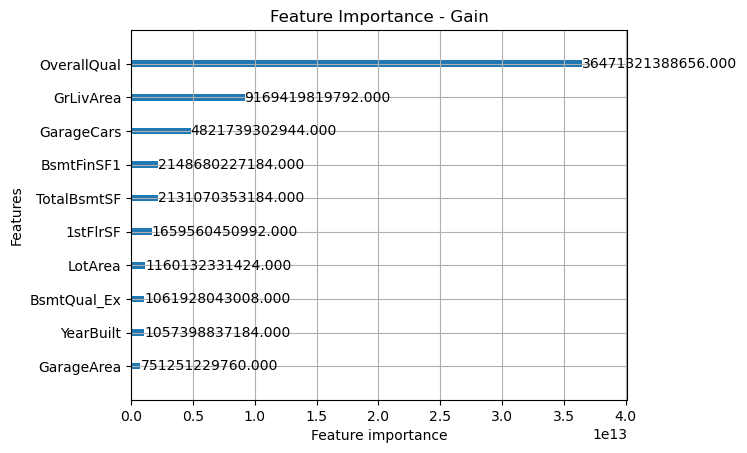

In [17]:
lgb.plot_importance(gbm, max_num_features=10, importance_type='gain')
plt.title("Feature Importance - Gain")
plt.show()